In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv('/content/sales_data_with_discounts.csv')

In [ ]:
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


**Descriptive Analytics for Numerical Columns**


In [ ]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
df=data.describe().T[['mean', '50%', 'std']]

In [ ]:
df1.rename(columns={'50%': 'median'}, inplace=True)
df1= df
df1

,mean,50%,std
Volume,5.066667,4.000000,4.231602
Avg Price,10453.433333,1450.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,50535.074173
Discount Rate (%),15.155242,16.577766,4.220602
Discount Amount,3346.499424,988.933733,4509.902963
Net Sales Value,30466.336131,4677.788059,46358.656624


In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Calculate the mode for each numerical column
modes = {col: data[col].mode().iloc[0] if not data[col].mode().empty else None for col in numerical_columns}
modes_df = pd.DataFrame(modes, index=["Mode"])# Display the modes
print(modes_df)

      Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
Mode       3        400              24300           5.007822   

      Discount Amount  Net Sales Value  
Mode        69.177942       326.974801  


In [ ]:
 Mode_add = modes_df.T[['Mode']]
Mode_add

,Mode
Volume,3.000000
Avg Price,400.000000
Total Sales Value,24300.000000
Discount Rate (%),5.007822
Discount Amount,69.177942
Net Sales Value,326.974801


In [ ]:
df1.insert(1, 'Mode',[3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801], True)
df1

,mean,Mode,50%,std
Volume,5.066667,3.000000,4.000000,4.231602
Avg Price,10453.433333,400.000000,1450.000000,18079.904840
Total Sales Value,33812.835556,24300.000000,5700.000000,50535.074173
Discount Rate (%),15.155242,5.007822,16.577766,4.220602
Discount Amount,3346.499424,69.177942,988.933733,4509.902963
Net Sales Value,30466.336131,326.974801,4677.788059,46358.656624


**interpretation of these statistics**

Volume:

The average sales volume is approximately 5 units.
The median sales volume is 4 units, indicating that half of the sales volumes are below 4 units.
The mode, the most frequently occurring sales volume, is 3 units.
The standard deviation is 4.23 units, indicating variability in sales volume.


Avg Price:

The average price is 10453.43, but this high value suggests that there may be some high-priced outliers.
The median price is 1450.00, which is more representative of the central tendency.
The mode, or the most common price, is 400.00.
The high standard deviation of 18079.90 indicates significant price variability.

Total Sales Value:

The average total sales value is 33812.84.
The median total sales value is 5700.00, indicating that half of the sales values are below this amount.
The mode is 24300.00, showing that this sales value occurs most frequently.
The high standard deviation of 50535.07 indicates significant variability in total sales values.

Discount Rate (%):

The average discount rate is 15.16%.
The median discount rate is 16.58%, indicating that half of the discount rates are below this value.
The mode is 5.01%, the most common discount rate.
The standard deviation of 4.22% shows moderate variability in discount rates.

Discount Amount:

The average discount amount is 3346.50.
The median discount amount is 988.93, indicating that half of the discount amounts are below this value.
The mode, the most common discount amount, is 69.18.
The standard deviation of 4509.90 indicates considerable variability in discount amounts.

Net Sales Value:

The average net sales value is 30466.34.
The median net sales value is 4677.79, indicating that half of the net sales values are below this amount.
The mode is 326.97, the most common net sales value.
The high standard deviation of 46358.66 indicates significant variability in net sales values.
These statistics provide insights into the central tendency, dispersion, and frequency of values for each numerical column in the dataset.

# Data Visualizations:

**Histograms:**

In [ ]:
data


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

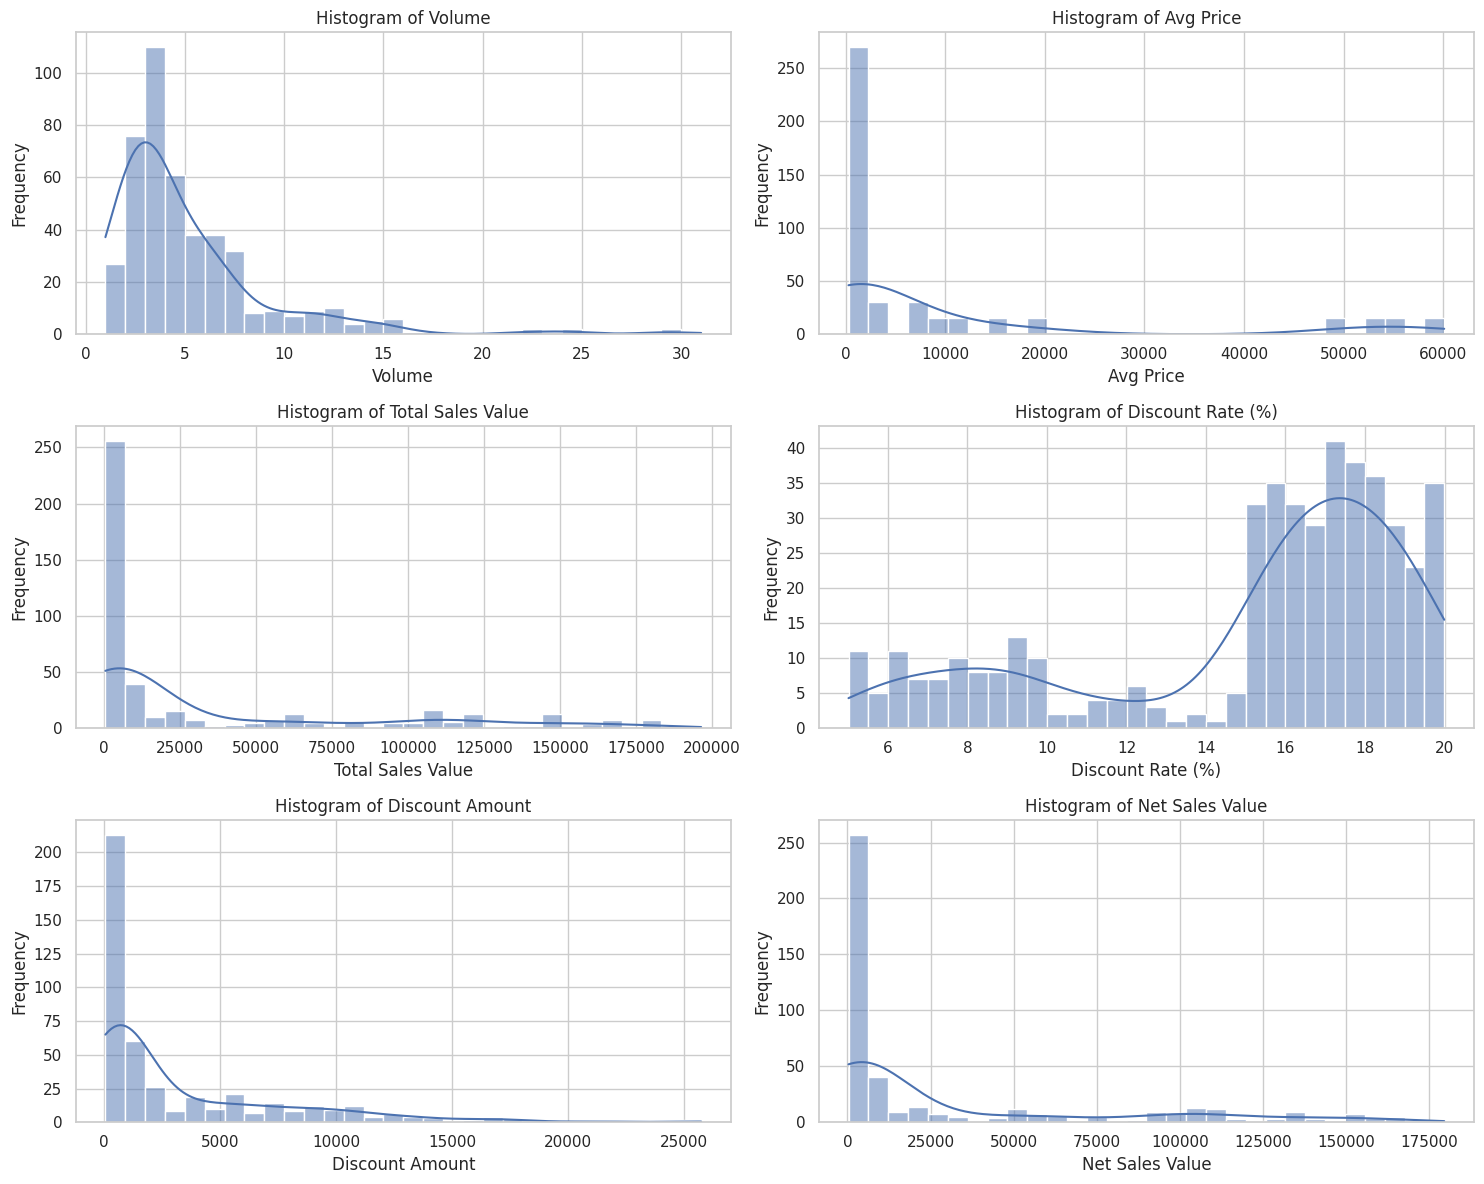

In [ ]:
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Plot histograms
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**From above histogram plot,I conclude that**
* The column is log narmally distributed and right skewed.
* The column presence of outliers
* It contains extreme values distributed and there is no unusual distributions from the column
* At starting first bin low values are distributed later suddenly go high then slowly decreased the distribution values in remaining bins.
* There is no outliers below the lower bound
* The outliers are present at above the upper

**From above histogram plot,I conclude that**
* The distribution of the column belongs to poisson distribution.
* The column presence of outliers at upper bound.
* In certain bins there is no distribution happened. So, There may be cause in the unusual distribution.
* At starting first bin more values are distributed and then in remaining bins are very less
* There is no outliers below the lower bound
* The outliers are present at above the upper

**From above histogram plot, I conclude that**
* This is belongs to poisson distribution
* This has same properties like above column. But, There is no unsual distribution in this colum

**From above histogram plot,I conclude that**
* The column is log narmally distributed and left skewed.
* The column presence of outliers
* There is no unusual distributions from the column
* At starting bins low values are distributed later high values are distributed in remaining bins.
* There is no presence of outliers in the upper bound.
* The outliers are present at above the lower

**From the above histogram plot, I conclude that**
* The column is brlongs to the poisson distribution
* At starting bin more values are ditributed, Then dicreased the ditributed values.
* At the end of the upper bound low values are ditributed those may be outliers.
* The outliers are present at upper bound and there is no outliers in lower b

**From the above histogram, I conclude that**
* The column is poisson distributed.
* There is no unsual distribution in the columnound boundn. bound bound

## **Box Plot**

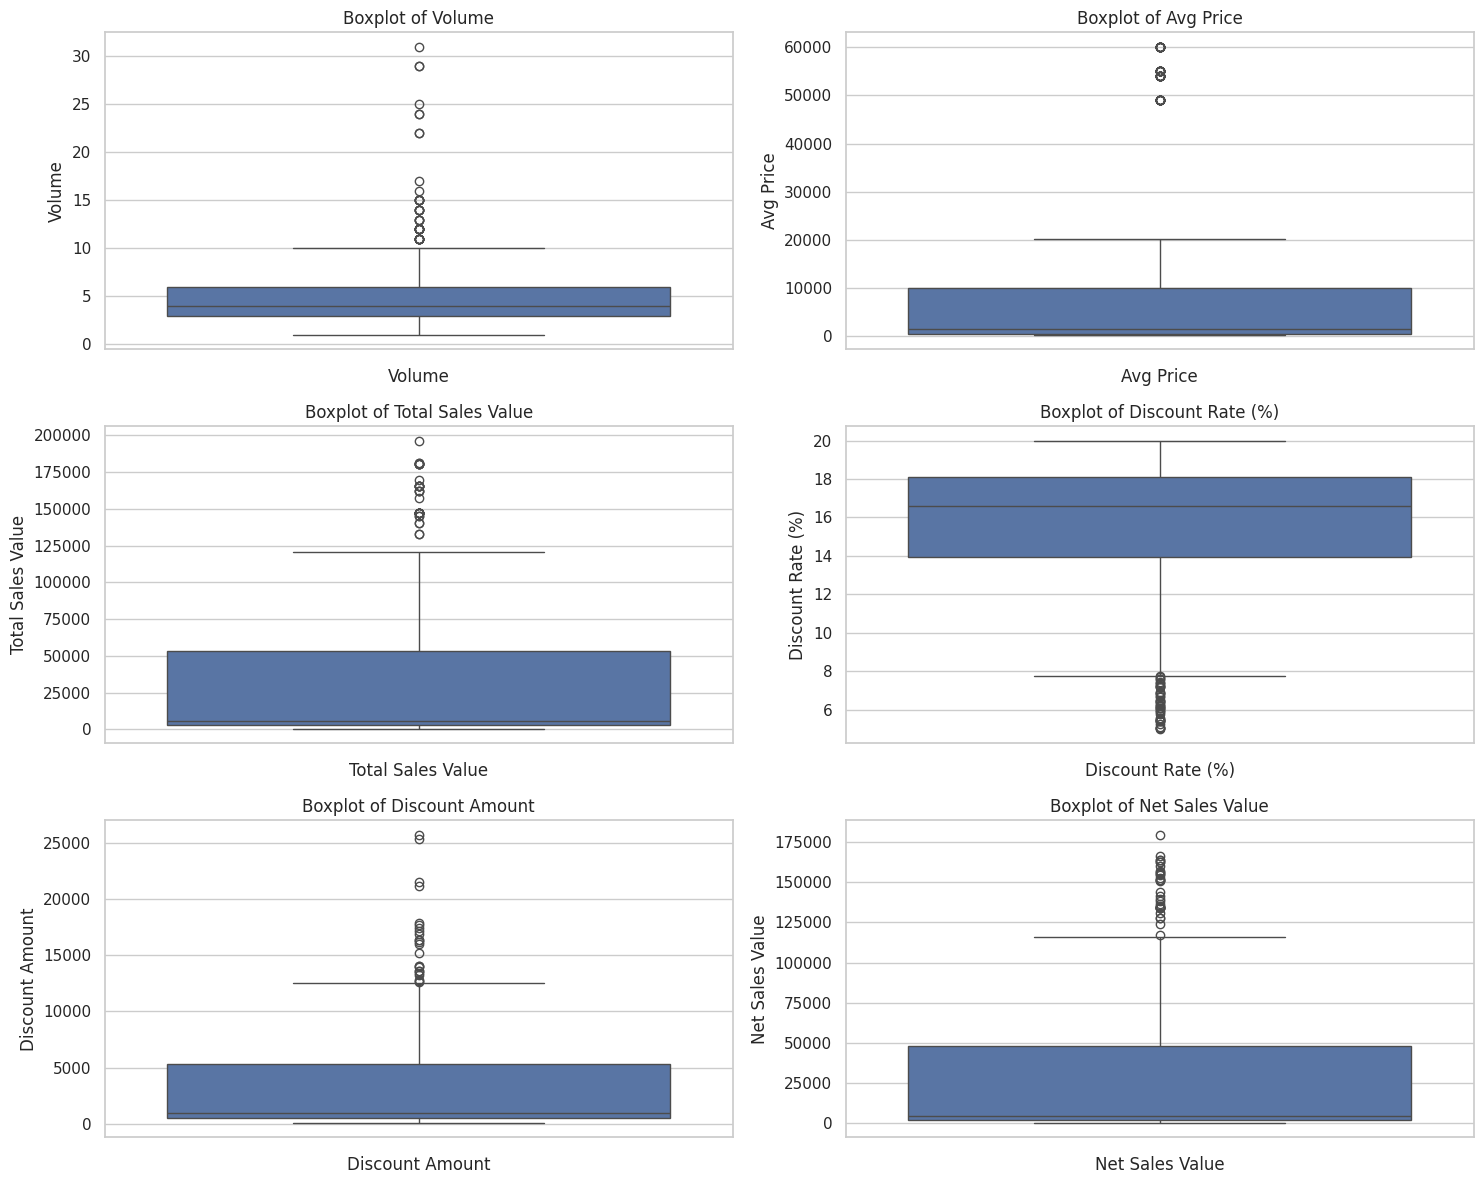

In [ ]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**From above Box Plot, I conclude that**
* There are ouliers at upper bound.
* The more values are distributed above the median.
* There are total of 12 outlier values in this column.
* For this upper bound is 10 and lower bound is 1

**From above Box Plot, I conclude that**
* There are ouliers at upper bound
* The maximum values are distributed above the median.
* There are total of 4 outliers in this column
* For this the upper bound in 20.1k and lower bound is

**From above Box Plot, I conclude that**
* There are ouliers at upper bound
* The maximum values are distributed above the median.
* There are total of 11 outliers in this column
* For this the upper bound is 120.6k and lower bound is

**From above Box Plot, I conclude that**
* There are ouliers at lower bound
* The maximum values are distributed above the median.
* There are more outliers in this column
* For this the upper bound is 19.99 and lower bound is

**From above Box Plot, I conclude that**
* There are ouliers at upper bound
* The maximum values are distributed above the median.
* There are total of 4 outliers in this column
* For this the upper bound in 20.1k and lower bound is 2905.00 400 290

# Bar Chart

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [ ]:
import plotly.express as px

In [ ]:
df1 = data['City'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
df1

,City,count
0,C,450


In [ ]:
fig = px.bar(df1,x='City',y='count',text_auto=True,template='plotly_dark',color='City') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For City', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* There is only one unique value in this column
* The count of the unique value is 450

In [ ]:
df1 = data['Date'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
fig = px.bar(df1,x='Date',y='count',text_auto=True,template='plotly_dark',color='Date') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For Date', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* In this column all categories are equally distributed.
* The count of the each unique value is 30

In [ ]:
df1 =data['Day'].value_counts()
df1 =pd.DataFrame(df1).reset_index()
df1

,Day,count
0,Thursday,90
1,Friday,60
2,Saturday,60
3,Sunday,60
4,Monday,60
5,Tuesday,60
6,Wednesday,60


In [ ]:
df1 = data['Day'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
fig = px.bar(df1,x='Day',y='count',text_auto=True,template='plotly_dark',color='Day') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For Day', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* There are total of 7 unique values in this column. Those represents the days a week
* Expect Thursday all values are distributed equally of value 60.
* By this the most no of sales happen on thursday

In [ ]:
df1 = data['Date'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
fig = px.bar(df1,x='Date',y='count',text_auto=True,template='plotly_dark',color='Date') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For Date', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* In this column all categories are equally distributed.
* The count of the each unique value is 30day

In [ ]:
df1 = data['SKU'].value_counts()
df1 = pd.DataFrame(df1).reset_index()
df1

,SKU,count
0,M01,15
1,M02,15
2,M03,15
3,M04,15
4,M05,15
5,M06,15
6,M07,15
7,M08,15
8,M09,15
9,M10,15


In [ ]:
df1 = data['SKU'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
fig = px.bar(df1,x='SKU',y='count',text_auto=True,template='plotly_dark',color='SKU') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For SKU', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* In this column all categories are equally distributed.
* The count of the each unique value is 15.

In [ ]:
df1 = data['Model'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
fig = px.bar(df1,x='Model',y='count',text_auto=True,template='plotly_dark',color='Model') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For Model', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* In this column all categories are equally distributed.
* The count of the each unique value is 15

In [ ]:
df1 = data['BU'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
fig = px.bar(df1,x='BU',y='count',text_auto=True,template='plotly_dark',color='BU') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For BU', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* In this column all categories are equally distributed.
* The count of the each unique value is 150
* There are total of 3 categories

In [ ]:
df1 = data['Brand'].value_counts().reset_index() #Getting unique values in the column with respective their count
df1 = pd.DataFrame(df1) #creating dataframe for unique values in the column with respective their count
fig = px.bar(df1,x='Brand',y='count',text_auto=True,template='plotly_dark',color='Brand') #Creating a plot for categorical column with respective their count
fig.update_traces(textposition='outside') #Put text position outside of the bar
fig.update_layout(title='Bar Chart For Brand', #title of the plot
                 title_x=0.5) #title position in the plot
fig.show() #displaying the plot

**From the above bar plot, I conclude that**
* In this column all categories are unequally distributed.
* For the brand Jeera has more sales occured.

Standardization of Variables

In [ ]:
for x in data.describe().columns:
    l = [] #Initilizing the list to append all values to this list later update values using this list
    for y in data[x]:
        mean = data[x].mean() #Calculating the mean of the column
        std = data[x].std() #Calculating the standard deviation of the column
        z = (y-mean)/std #calculating the z value
        l.append(round(z,2)) #append calculated z values to list
    data[x].update(l) #Updating the column with list
data #Displaying the column after normalization

/tmp/ipython-input-319592248.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.35,Mobiles,RealU,RU-10,0.09,2.92,-0.83,3.95,2.80
1,01-04-2021,Thursday,M02,C,1.17,Mobiles,RealU,RU-9 Plus,-0.02,1.33,-0.85,1.85,1.27
2,01-04-2021,Thursday,M03,C,0.46,Mobiles,YouM,YM-99,0.31,1.56,-1.35,1.62,1.54
3,01-04-2021,Thursday,M04,C,0.22,Mobiles,YouM,YM-99 Plus,0.53,1.72,-1.95,1.11,1.76
4,01-04-2021,Thursday,M05,C,-0.49,Mobiles,YouM,YM-98,-0.13,-0.19,0.67,0.23,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.72,Lifestyle,Jeera,M-Casuals,-0.51,-0.62,0.08,-0.65,-0.61
446,15-04-2021,Thursday,L07,C,0.22,Lifestyle,Viva,W-Western,-0.43,-0.36,0.45,-0.15,-0.38
447,15-04-2021,Thursday,L08,C,-0.72,Lifestyle,Viva,W-Lounge,-0.49,-0.61,0.90,-0.61,-0.60
448,15-04-2021,Thursday,L09,C,-0.49,Lifestyle,Jeera,M-Formals,-0.47,-0.56,0.39,-0.53,-0.55


# Conversion of Categorical Data into Dummy Variables

In [ ]:
d = pd.get_dummies(data,columns=categorical_columns,dtype=int)
d.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.35,0.09,2.92,-0.83,3.95,2.80,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.17,-0.02,1.33,-0.85,1.85,1.27,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.46,0.31,1.56,-1.35,1.62,1.54,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.22,0.53,1.72,-1.95,1.11,1.76,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.49,-0.13,-0.19,0.67,0.23,-0.23,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Conclusion:

**1. Sales Volume Distribution**
**Mean Volume:** 5.07 units

**Standard Deviation:** 4.23 units

**Range:** 1 to 450 units

* The histogram shows a high frequency at the lower end, indicating that most sales volumes are low.

**2. Average Price Distribution**

**Mean Average Price:** 10,453.40

**Standard Deviation:** 18,079.90

**Range:** 290 to 60,100

* The histogram reveals a right-skewed distribution, suggesting that while most products are priced lower, a few high-priced items significantly raise the average price.

**3. Total Sales Value Distribution**

**Mean Total Sales Value:** 33,812.80

**Standard Deviation:** 50,535.10

**Range:** 400 to 196,400

* The histogram indicates a right-skewed distribution, similar to average prices, with most sales values clustering at the lower end.

**4. Discount Rate Distribution**

**Mean Discount Rate:** 15.16%

**Standard Deviation:** 4.22%

**Range:** 5.01% to 450%

* The histogram shows a concentration of discount rates at lower percentages, with a few outliers showing extremely high discount rates.

**5. Net Sales Value Distribution**

**Mean Net Sales Value:** 30,466.34

**Standard Deviation:** 46,358.66

**Range:** 326.97 to 179,507.48

* The histogram for net sales values shows a distribution with multiple peaks, indicating variability in how net sales are spread across different sales values.